In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/luis/.virtualenvs/domino/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
import sys
sys.path.insert(1, '../domino/libs')
sys.path.insert(1, '../domino')
sys.path.insert(1, '/home/earendil/Documents/MyLib')

#style.use('/home/earendil/Documents/MyLib/big_plt_style.mplstyle')

import pandas as pd

from libs.utilities import domino_mysql_server, read_mysql

/home/luis/.virtualenvs/domino/lib/python3.5/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


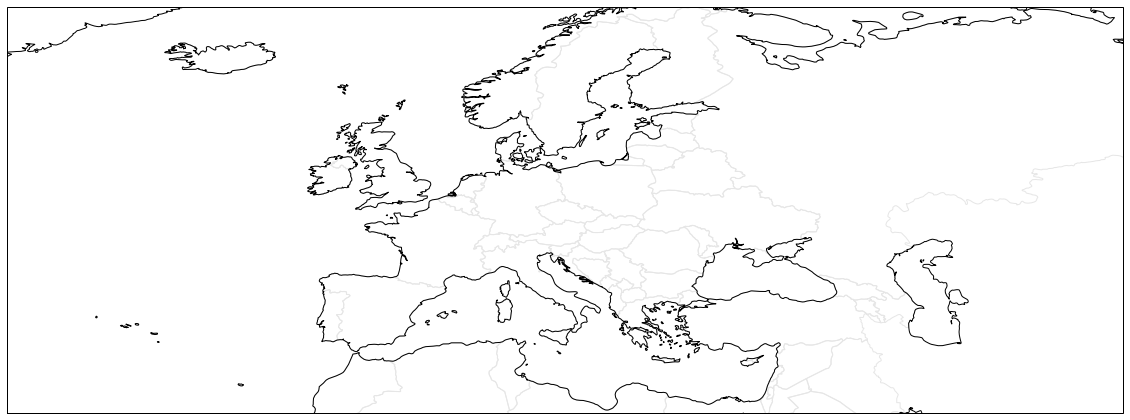

In [2]:
from cartopy.io import shapereader
import numpy as np
import geopandas
import matplotlib.pyplot as plt

import cartopy.crs as ccrs

# get natural earth data (http://www.naturalearthdata.com/)

# get country borders
resolution = '50m'
category = 'cultural'
name = 'admin_0_countries'

shpfilename = shapereader.natural_earth(resolution, category, name)

# read the shapefile using geopandas
df = geopandas.read_file(shpfilename)

# read the german borders
poly = df.loc[(df['CONTINENT'] == 'Europe') | 
              ((df['CONTINENT']=="Africa") &
               (df['SUBREGION']=="Northern Africa") | 
              ((df['CONTINENT']=="Asia") &
               (df['SUBREGION']=="Western Asia")))]['geometry']#.values[0]


fig=plt.figure(figsize=(20, 15))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', 
                  edgecolor='0.9')

ax.coastlines(resolution='50m')

ax.set_extent([-40, 70, 30, 70], crs=ccrs.PlateCarree())

plt.show()

 ## MAPS O-D PAIR AND DEMAND BETWEEN ROUTES

In [192]:
import cartopy.crs as ccrs

# get country borders
resolution = '50m'
category = 'cultural'
name = 'admin_0_countries'

shpfilename = shapereader.natural_earth(resolution, category, name)

# read the shapefile using geopandas
dfb = geopandas.read_file(shpfilename)

# read the german borders
poly = dfb.loc[(dfb['CONTINENT'] == 'Europe') | 
              ((dfb['CONTINENT']=="Africa") &
               (dfb['SUBREGION']=="Northern Africa") | 
              ((dfb['CONTINENT']=="Asia") &
               (dfb['SUBREGION']=="Western Asia")))]['geometry']#.values[0]


od = [('UKBB','UACC'),('UUEE','LROP'),('LTBA','UUWW'),
    ('LROP','UUEE'),('LTBA','OJAI'),
    ('EIDW','EGJJ'), ('PAFA','EDDF'), ('LSGG','LIRF'), ('LFPG','EDDF'), 
    ('EHEH','EDDT'), ('LIME','LQMO'), ('LIPZ','LSGG'), ('LEAM','LEMD'), ('LEAM','GEML'), 
    ('LGAV','LGTS'), ('GCFV','GCLA'), ('EFTP','EFHK'), ('ENVA','ENBR'), ('EDDF','LKPR'),
    ('LSGG','EGLL'), ('LEGR','GEML'), ('LEMD','LELC'), ('EDDT','UMKK'), ('LFPG','LFBO'), 
    ('ESUP','EETN'), ('UKBB','UKHH')
     ]

lod = ["r.icao_orig=\""+t[0]+"\" and r.icao_dest=\""+t[1]+"\"" for t in od]
airports = ""
for l in lod:
    airports += (l + " or ")
    


# Get model output
with domino_mysql_server(profile='remote_direct') as connection:
    query = "select r.id, r.icao_orig, r.icao_dest, r.fp_distance_km, sequence, \
    ST_X(entry_point) as lat_entry, ST_Y(entry_point) as lon_entry, \
    ST_X(exit_point) as lat_exit, ST_Y(exit_point) as lon_exit \
    from route_pool r \
    join route_pool_has_airspace_static rphas on rphas.route_pool_id=r.id \
    where "+airports[:-4]

    df_orig = read_mysql(query=query, engine=connection['engine'])
    
    
df=df_orig[['id','icao_orig','icao_dest','sequence','fp_distance_km','lat_entry','lon_entry']].rename(columns={'lat_entry':'lat','lon_entry':'lon'}).append(
df_orig[['id','icao_orig','icao_dest','sequence','fp_distance_km','lat_exit','lon_exit']].rename(columns={'lat_exit':'lat','lon_exit':'lon'})).drop_duplicates().sort_values(['id','sequence'])   

DB connection to 127.0.0.1 with ssh tunneling through archdb.fst.westminster.ac.uk


EDDF LKPR


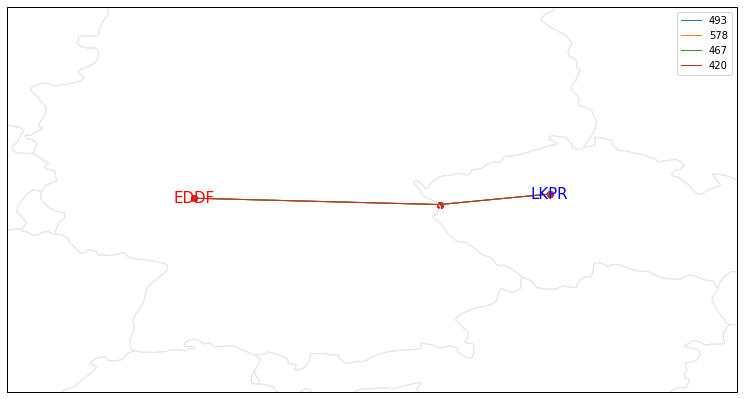

EFTP EFHK


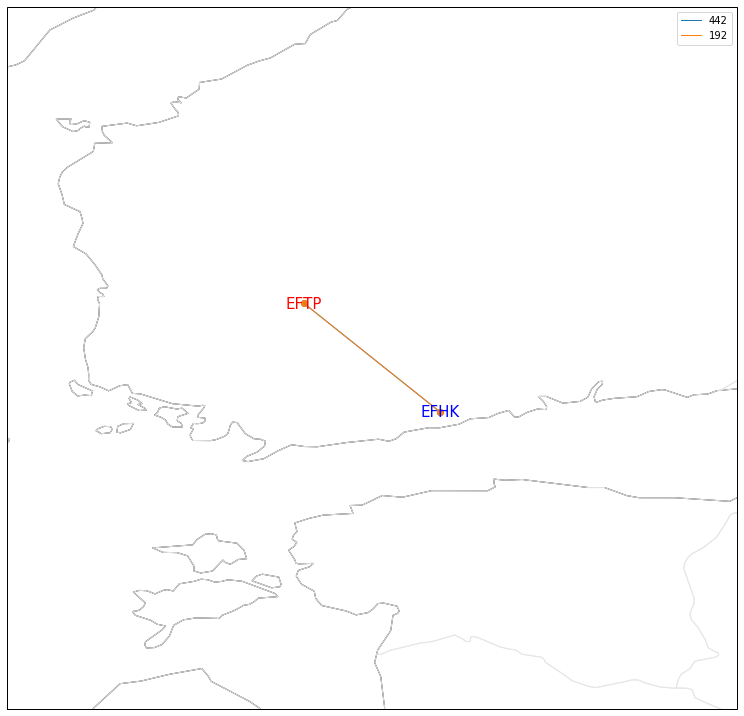

EHEH EDDT


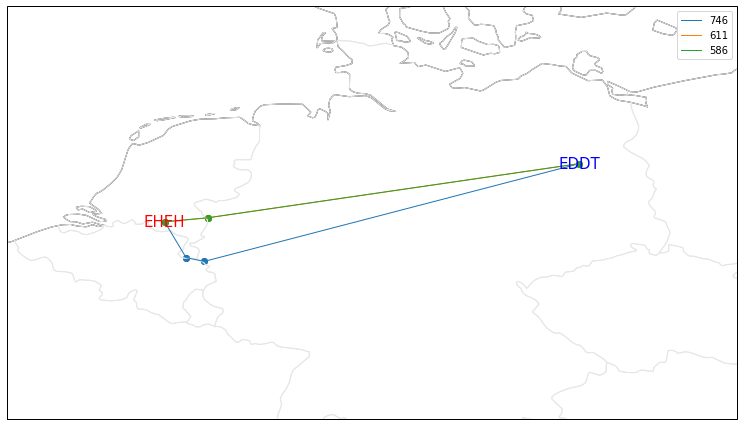

ENVA ENBR


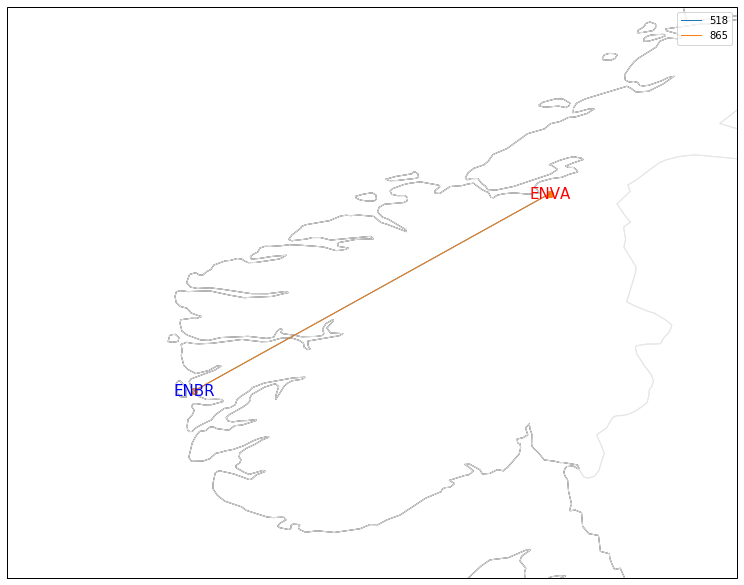

LEAM LEMD


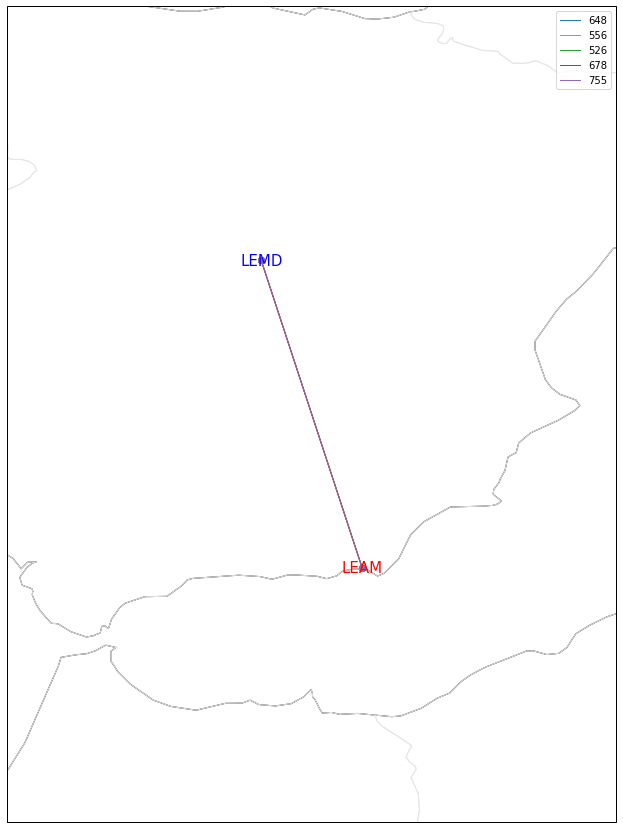

LEMD LELC


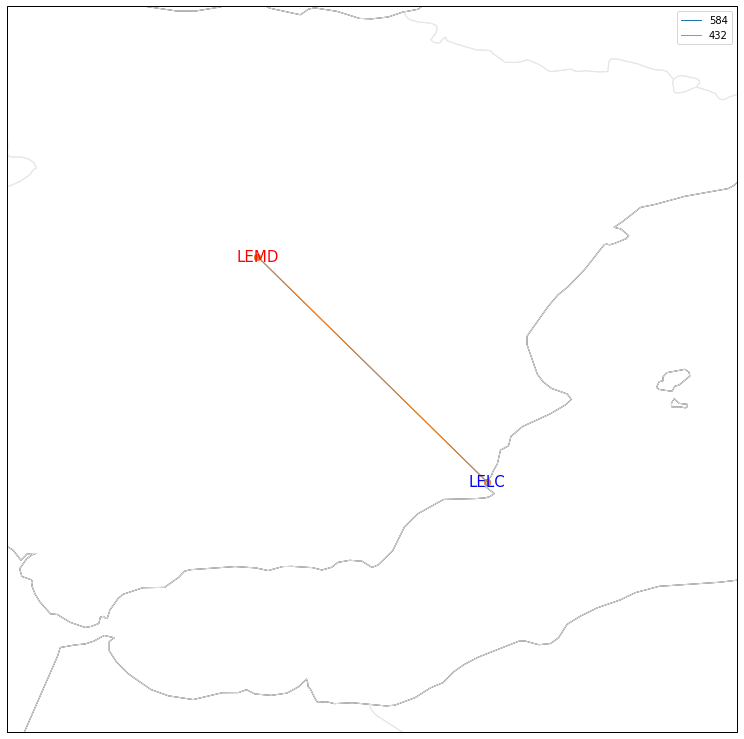

LFPG EDDF


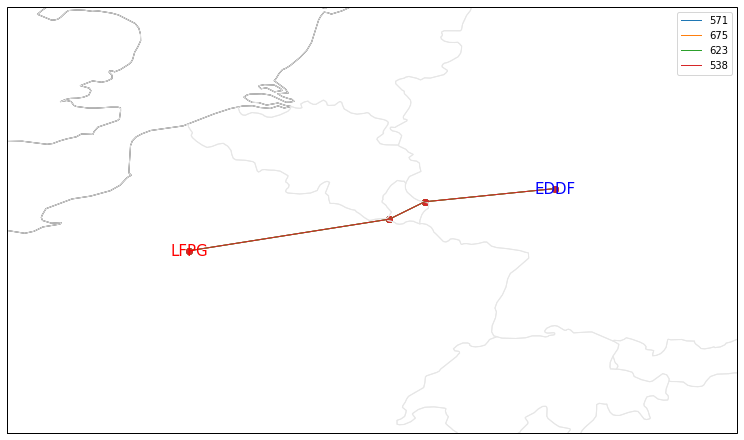

LFPG LFBO


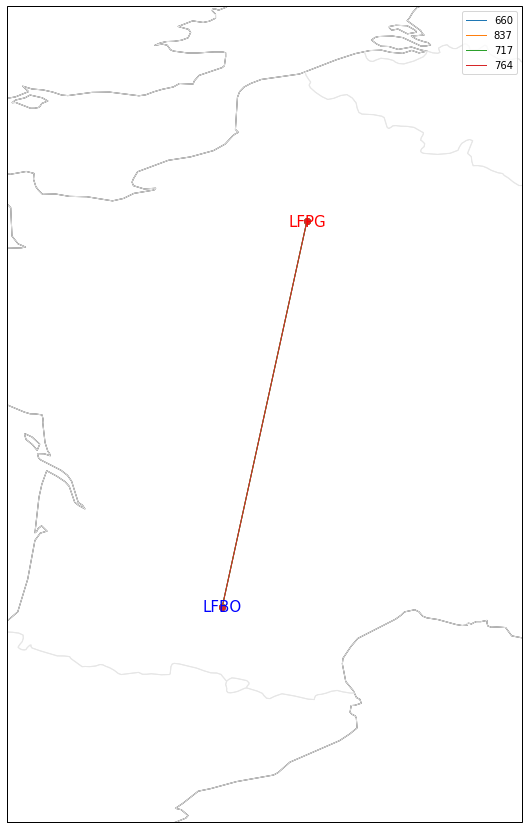

LGAV LGTS


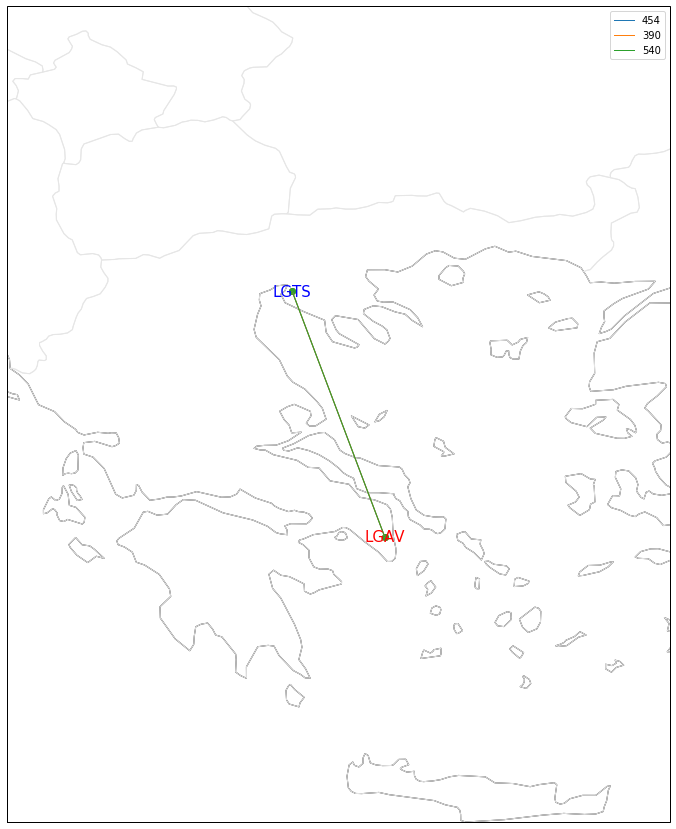

LIPZ LSGG


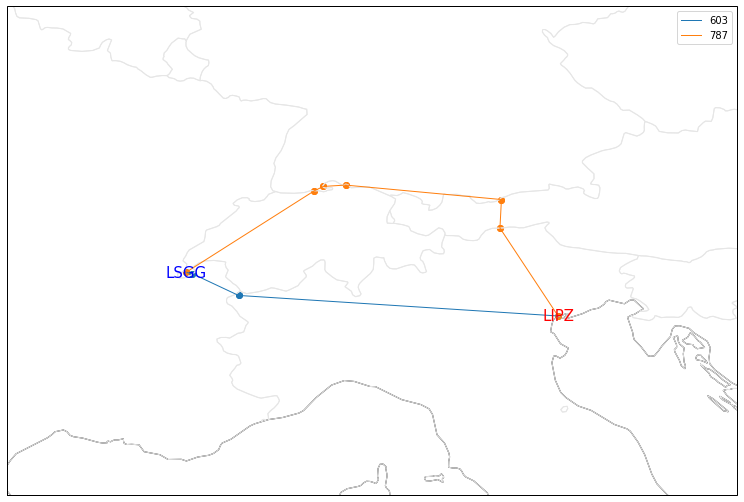

LROP UUEE


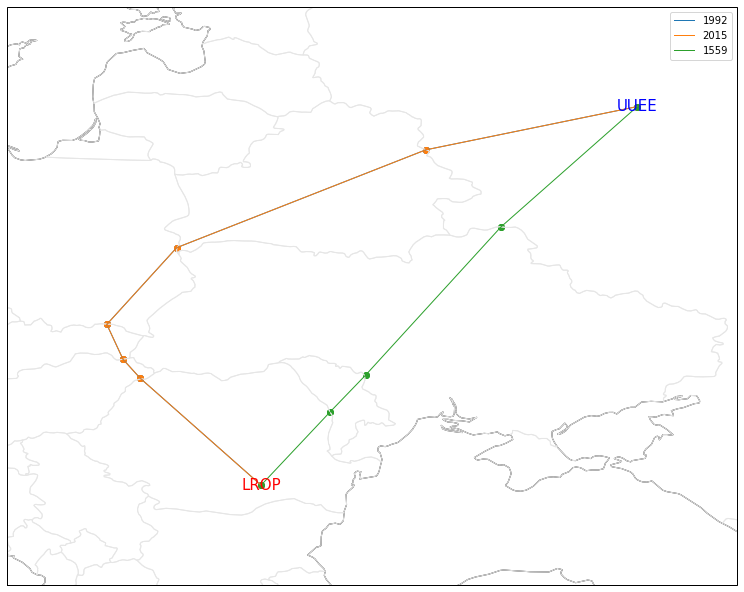

LSGG EGLL


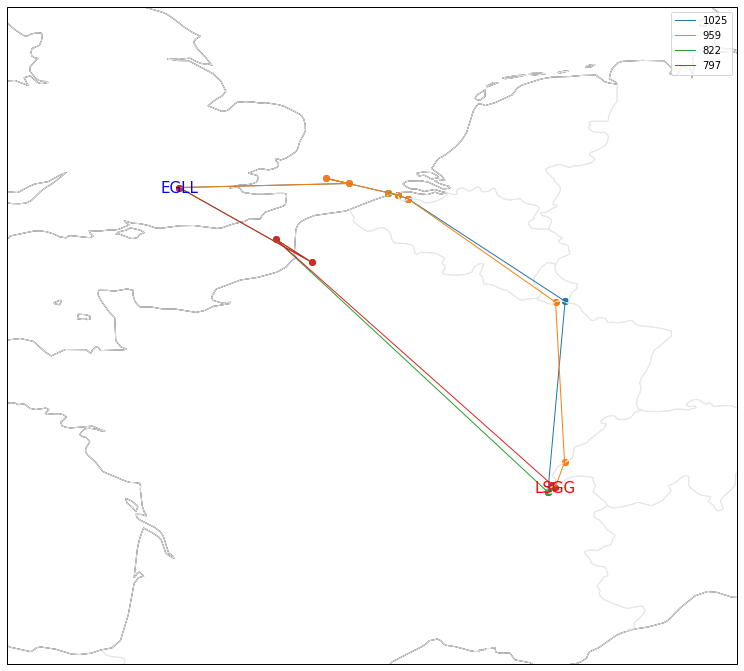

LSGG LIRF


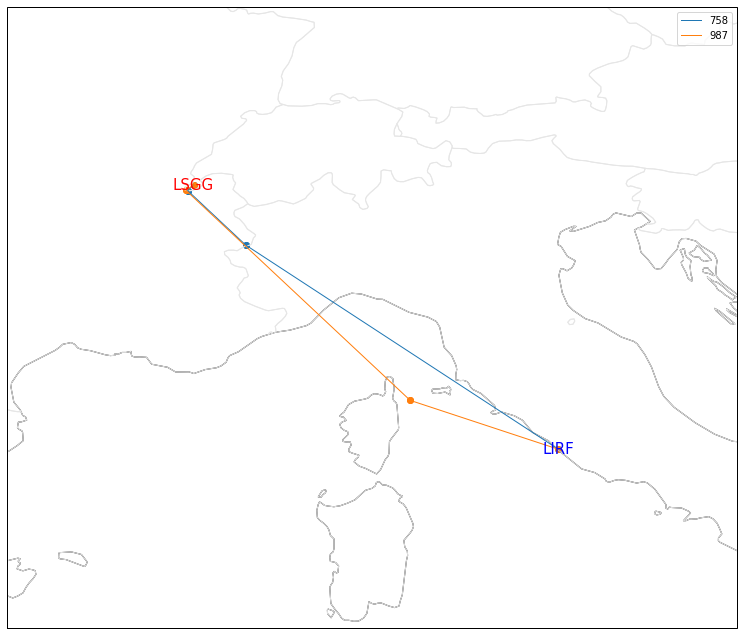

LTBA OJAI


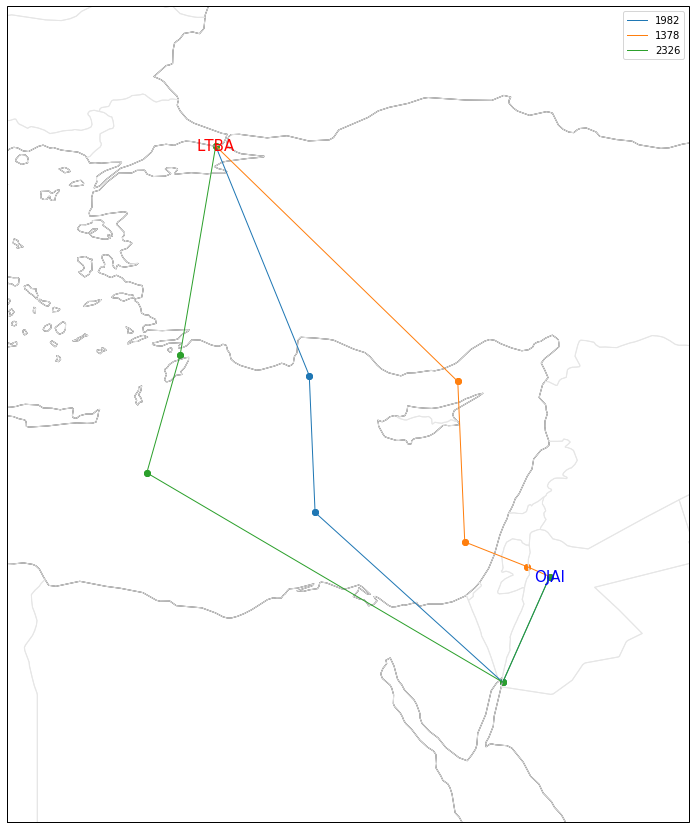

LTBA UUWW


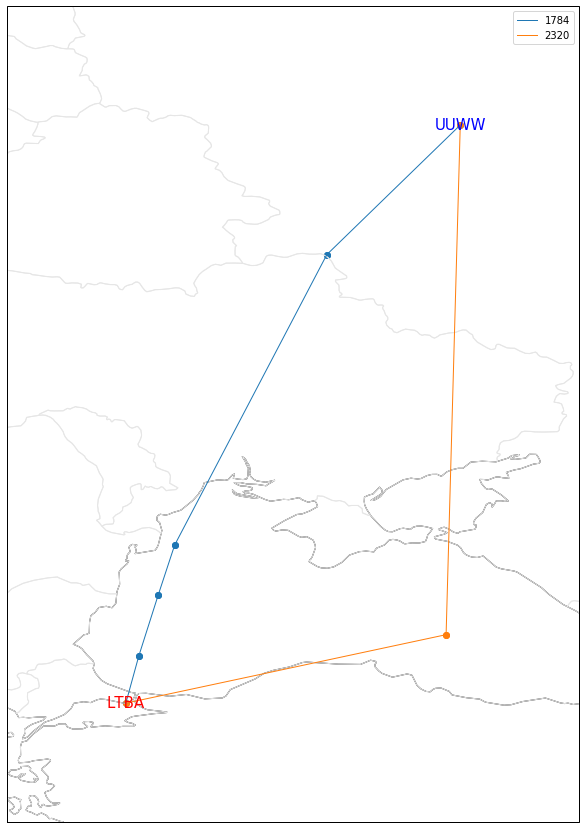

UKBB UACC


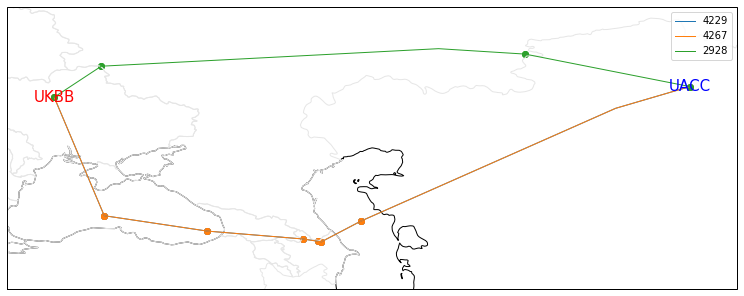

UKBB UKHH


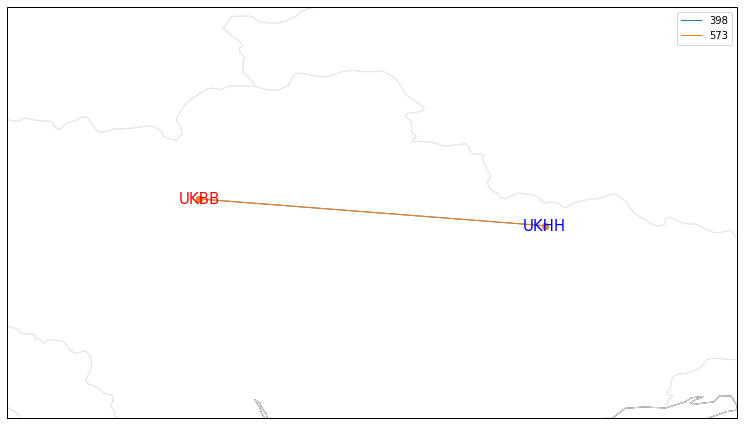

UUEE LROP


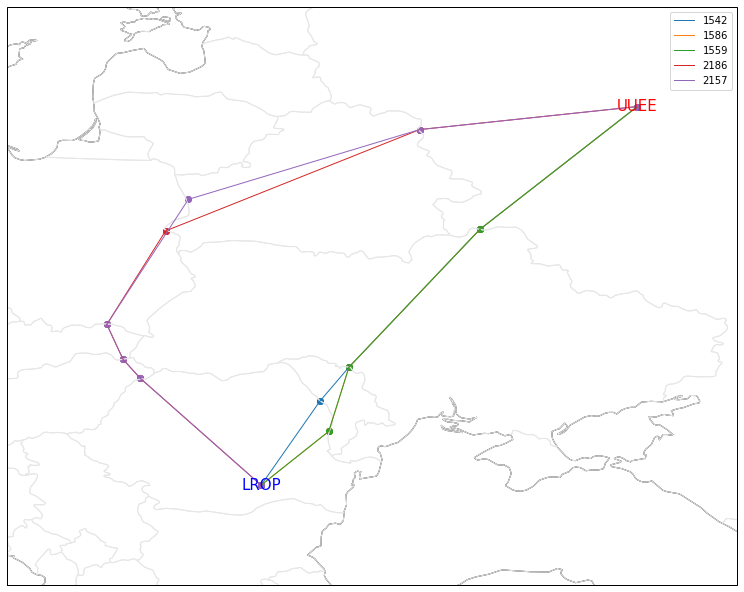

PAFA EDDF


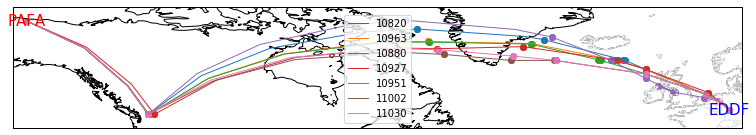

EIDW EGJJ


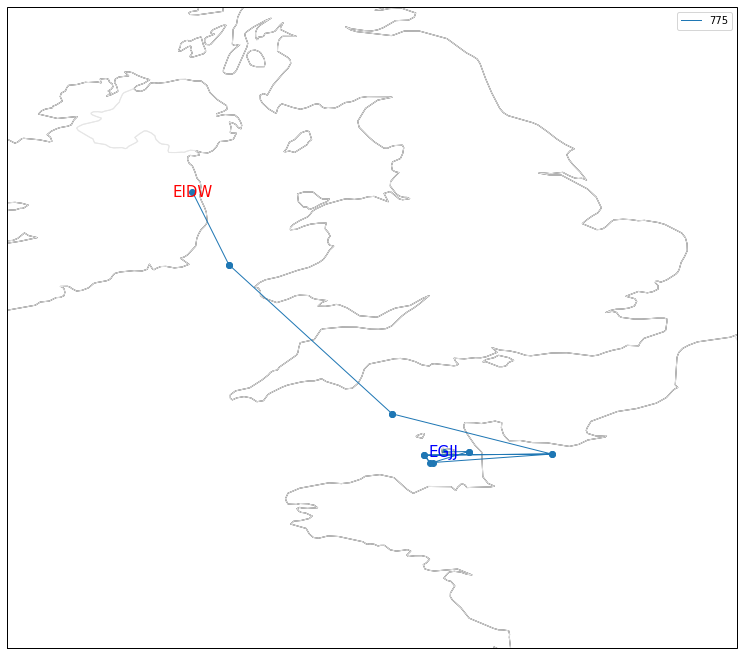

LIME LQMO


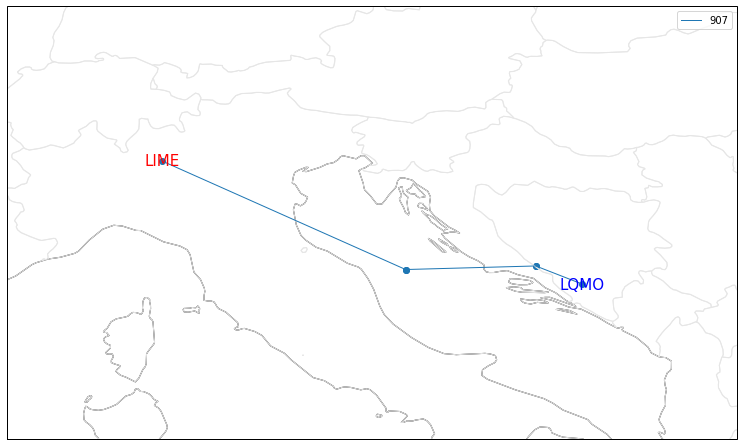

LEAM GEML


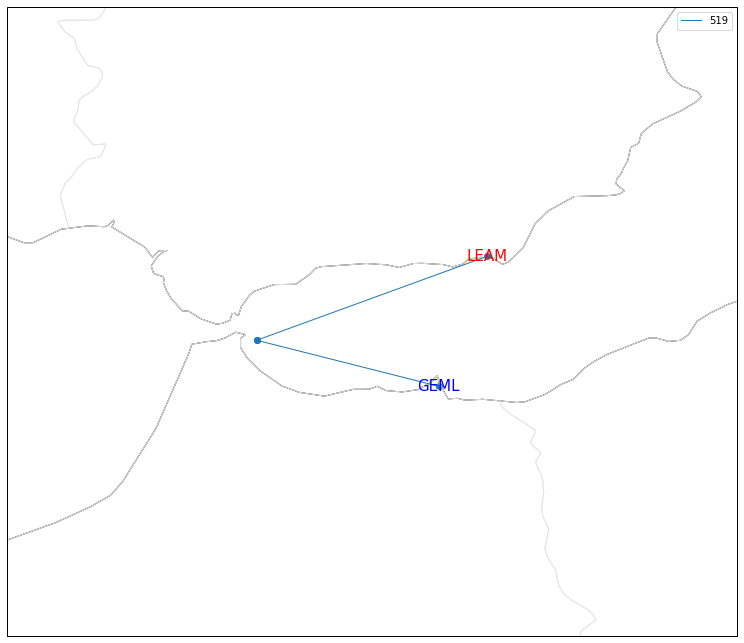

LEGR GEML


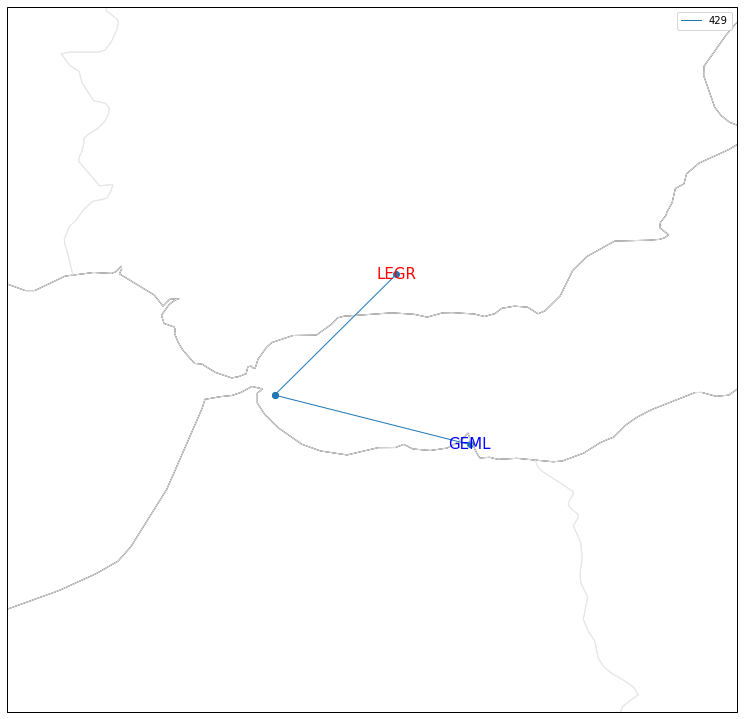

EDDT UMKK


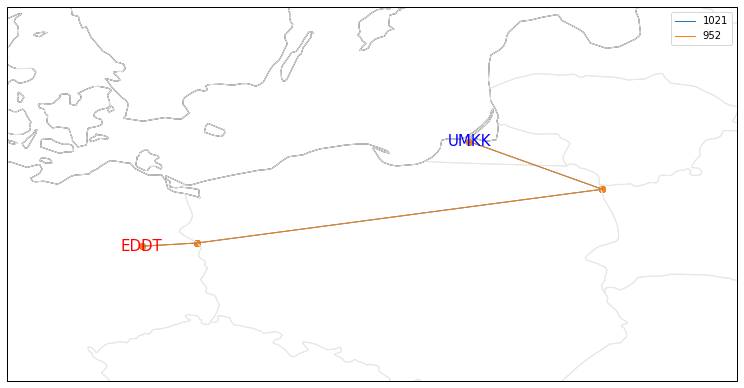

GCFV GCLA


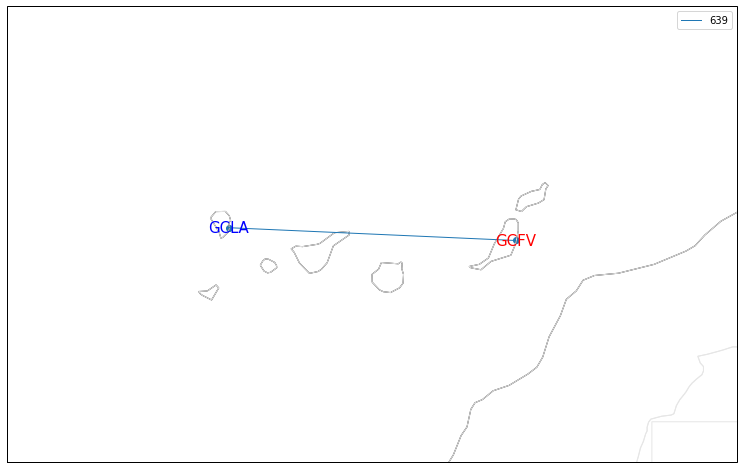

ESUP EETN


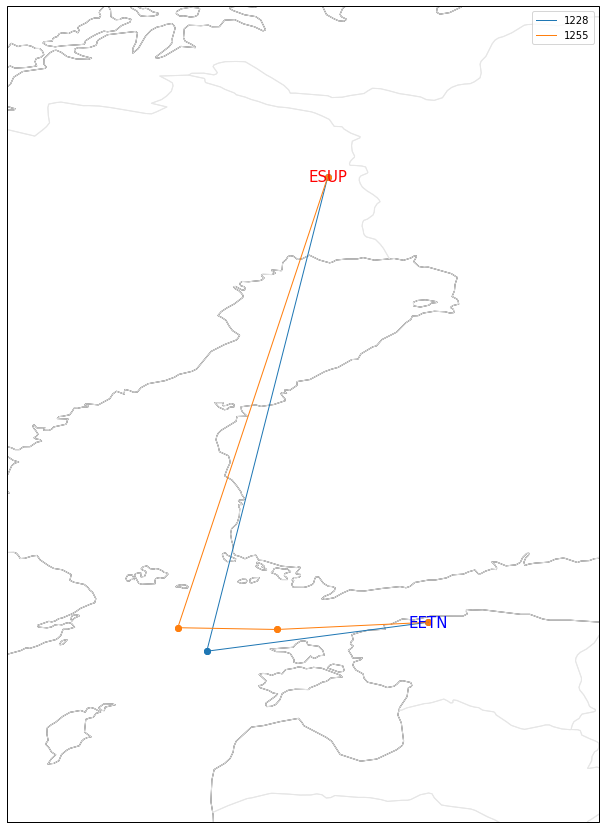

In [193]:
plt.close()
scale = 5

for ia,row in df[['icao_orig','icao_dest']].drop_duplicates().iterrows():
    d_coords_route_pool = df[(df['icao_orig']==row[0]) & (df['icao_dest']==row[1])]
    
    unique_id = d_coords_route_pool['id'].drop_duplicates()
    

    min_lon = min(d_coords_route_pool['lon'])
    max_lon = max(d_coords_route_pool['lon'])
    min_lat = min(d_coords_route_pool['lat'])
    max_lat = max(d_coords_route_pool['lat'])
    
    fig=plt.figure(ia,figsize=(2.61538461538*scale, 3*scale))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([min_lon-3,max_lon+3,min_lat-3,max_lat+3],
                 crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    
    ax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', 
                  edgecolor='0.9')


    for i in unique_id:
        ax.plot(d_coords_route_pool.loc[d_coords_route_pool['id']==i,'lon'],
                 d_coords_route_pool.loc[d_coords_route_pool['id']==i,'lat'], linewidth=1,
                 transform=ccrs.Geodetic(),
                label=list(d_coords_route_pool.loc[d_coords_route_pool['id']==i,'fp_distance_km'].drop_duplicates())[0]
                 )

        ax.scatter(d_coords_route_pool.loc[d_coords_route_pool['id']==i,'lon'],
                 d_coords_route_pool.loc[d_coords_route_pool['id']==i,'lat'], linewidth=1,
                 transform=ccrs.Geodetic(),
                   label=''
                 )
    
    icao_orig = row[0]
    icao_dest = row[1]
    
    print(icao_orig,icao_dest)
    df_l = df_orig[(df_orig['icao_orig']==icao_orig) & (df_orig['icao_dest']==icao_dest)]
    ax.text(list(df_l[(df_l['sequence']==1)][['lat_entry','lon_entry']].drop_duplicates()['lon_entry'])[0],
        list(df_l[(df_l['sequence']==1)][['lat_entry','lon_entry']].drop_duplicates()['lat_entry'])[0],
        icao_orig,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=15, color='red',
        transform=ccrs.Geodetic())
    
    ax.text(list(df_l[(df_l['sequence']==max(df_l['sequence']))][['lat_exit','lon_exit']].drop_duplicates()['lon_exit'])[0],
        list(df_l[(df_l['sequence']==max(df_l['sequence']))][['lat_exit','lon_exit']].drop_duplicates()['lat_exit'])[0],
        icao_dest,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=15, color='blue',
        transform=ccrs.Geodetic())
    
    ax.legend()
    
    plt.savefig(icao_orig+"_"+icao_dest+".png")
    

    plt.show()
    plt.close()
    


In [133]:
df[['icao_orig','icao_dest']].drop_duplicates()

,icao_orig,icao_dest
9,EGKK,KJFK
0,LEBL,EGLL
22,UKBB,UACC


In [185]:
df_orig[(df_orig['sequence']==max(df_orig['sequence']))][['lat_exit','lon_exit']].drop_duplicates()

,lat_exit,lon_exit
42,51.022222,71.466944


In [186]:
df_orig

,id,icao_orig,icao_dest,fp_distance_km,sequence,lat_entry,lon_entry,lat_exit,lon_exit
0,47851,UUEE,LROP,1542,1,55.972500,37.413056,52.275000,32.673333
1,47851,UUEE,LROP,1542,2,52.275000,32.673333,48.125000,28.730556
2,47851,UUEE,LROP,1542,3,48.125000,28.730556,47.104167,27.858333
3,47851,UUEE,LROP,1542,4,47.104167,27.858333,44.571111,26.085000
4,47852,UUEE,LROP,1586,1,55.972500,37.413056,52.275000,32.673333
5,47852,UUEE,LROP,1586,2,52.275000,32.673333,48.125000,28.730556
6,47852,UUEE,LROP,1586,3,48.125000,28.730556,46.192222,28.123889
7,47852,UUEE,LROP,1586,4,46.192222,28.123889,44.571111,26.085000
8,47853,UUEE,LROP,1559,1,55.972500,37.413056,52.275000,32.673333
9,47853,UUEE,LROP,1559,2,52.275000,32.673333,48.125000,28.730556
